# Assessment - Machine Learning and Statistics

---

**Module ID:** 52954

**Student ID:** G00364778

**Submitted:** 29 November 2019

---

# Boston House Prices Dataset 

## Attribute Information (in order):
|Column|Description  |
|---|---|
|CRIM     |per capita crime rate by town|
|ZN       |proportion of residential land zoned for lots over 25,000 sq.ft.|
|INDUS    |proportion of non-retail business acres per town|
|CHAS     |Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)|
|NOX      |nitric oxides concentration (parts per 10 million)|
|RM       |average number of rooms per dwelling|
|AGE      |proportion of owner-occupied units built prior to 1940|
|DIS      |weighted distances to five Boston employment centres|
|RAD      |index of accessibility to radial highways|
|TAX      |full-value property-tax rate per \$10,000|
|PTRATIO  |pupil-teacher ratio by town|
|B        |1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town|
|LSTAT    |\% lower status of the population|
|MEDV     |Median value of owner-occupied homes in $1000's|


The table above shows a summary of the columns meaning extracted from the documentation on the dataset.

### <center>Table 1</center>

Some clarification on some columns that was not initially obvious from their descriptions. 

  - LSTAT - Percentage of working class people in the area
  - MEDV - The actual prices of the properties

The next step is to get some idea as to the relationships of the various datapoints in the set. This is achieved by the scatter_matrix function by creating a matrix of plots of all the datapoints against one another and get a visual indication of their relationships.

## Descriptive Statistics

In order to run and asses the dataset with basic descriptive statistics we will proceed to load all the required libraries, including Pandas, Matplotlib Pyplot and Seaborn.

A copy of the Boston house price dataset in locate in a local folder data and is loaded using the pandas read_csv function. The first row is skipped as it contains meta data for the dataset. 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # imported to suppress future deprecated warnings
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import numpy as np
#import style

#https://github.com/G00364778/52954_Assesment_Machine_Learning_and_Statistics/raw/master/data/boston_house_prices.csv
#data\\boston_house_prices.csv
df=pd.read_csv('https://github.com/G00364778/52954_Assesment_Machine_Learning_and_Statistics/raw/master/data/boston_house_prices.csv',skiprows=1)

The next step is running all the basic descriptive statistics on all the data columns available in the dataset. At this stage it is unclear what the columns mean and some research is required to determine what it means and discussed in the sections below.

In [2]:
#pl.ioff()
np.round(df.describe(),3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.378,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970,50.000


### <center>Table 2</center>

Looking at the raw descriptive statistics, after reading up on the various meanings of all the columns in itself does not really disclose that much. 

CRIM, crime per capita for a given region varies from practially zero to 88.

Visualisation tools however shows a much more visually descriptive picture of the dataset.

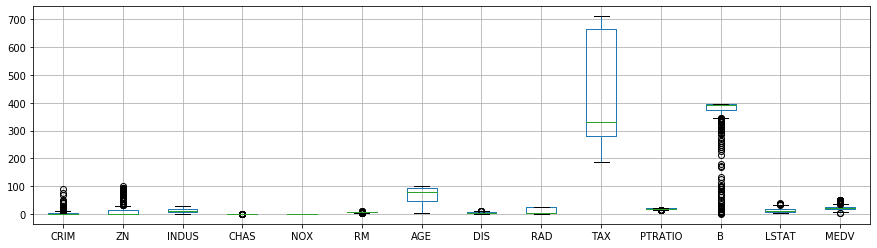

In [3]:
df.boxplot(figsize=(15,4))
pl.ion()

### <center>Figure 1</center>

The different scaling of the dataset variables makes it difficult to compare and contrast correlations between various data point, so we can get a better comparative view by normalising all the values to the same range.

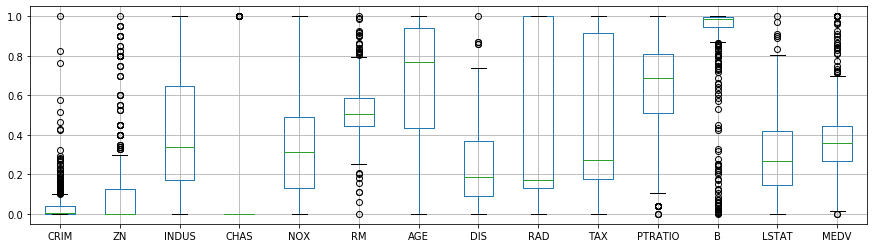

In [4]:
# import the pre processing library to normalise all the data values across the data set
from sklearn import preprocessing as pp
# set the minimum and maximum values to defaults of 0,1
minmax=pp.MinMaxScaler()
# dump the dataframe values to x
x=df.values
# transform the dumped values and return to variable scaled
scaled=minmax.fit_transform(x)
# convert back to  dataframe
df2=pd.DataFrame(scaled)
# export the heading to a list 
headings=list(df.columns.values)
# and add the heading back to the new normalised dataframe
df2.columns=headings
# and finally create another boxplot
df2.boxplot(figsize=(15,4))

### <center>Figure 2</center>

Some reading show that this dataset is included in the sklearn library and insight into the dataset can be gained with the DESCR query into the dataset.

What pops out at this stage is a significant amount of outliers in most of the variables in the dataset and some sets very tightly bunched distributions with fat tails and lots of outliers and other widely distributed and no outliers. 

In [5]:
from pandas.plotting import scatter_matrix as sm
#%matplotlib inline
#sm(df, figsize=(18,9), diagonal='kde')


Analysing the scatter matrix of plots show some visually obvious relationships between various data points. The red lines show upward/positive trends and the yellow lines negative/downward trends.

There are hints of relationships and further clarification required to better understand the relationships and meanings.

![title](https://github.com/G00364778/52954_Assesment_Machine_Learning_and_Statistics/raw/master/img/Boston_ScatterMatrix_Crop.jpg)

### <center>Figure 3</center>

In [6]:
np.round(df.corr(),3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


### <center>Table 3</center>

Plotting a correlation matrix shows the relative relationships is a tabular format in __Table 3__ and plotting that in a heatmap creates a very visual presentation of the result.

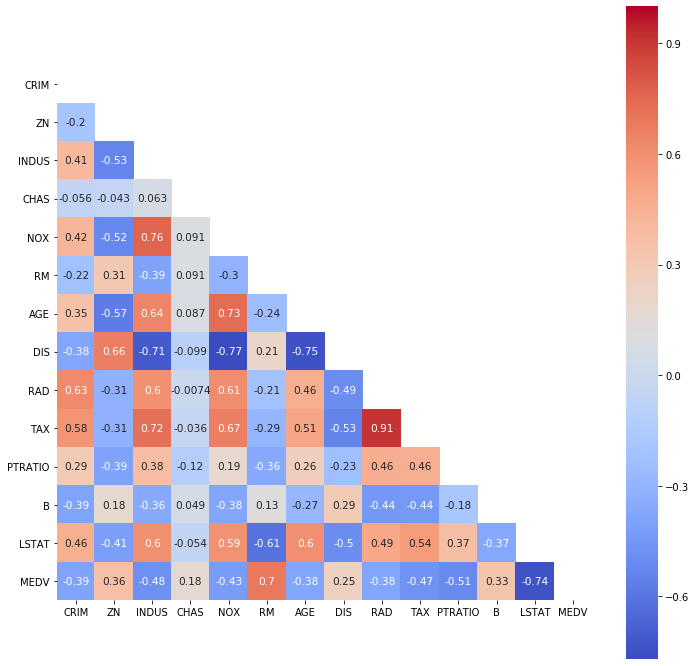

In [7]:
#import numpy as np

cor=df.corr()
#create a mask to plot only the lower half of the heatmap
mask=np.zeros_like(cor,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#set the plot size
pl.figure(figsize=(12,12))
#plot the heatmap
sns.heatmap(cor, mask=mask, xticklabels=cor.columns.values,
            square=True, cmap='coolwarm', #vmin=-1, vmax=1, center=0,
            yticklabels=cor.columns.values, annot=True, annot_kws={"size": 10.5})

### <center>Figure 4</center>

The strongest positive correlations are shown in darker reds and the strongest negative correlations in darker blues. 

We are interested in the values affecting MEDV and this is show in the last line in __Table 4__. The strongest positive correlation is RM, the number of rooms a house have and the strongest negative correlation is LSTAT, showing the proportion of population that is lower status. Proportion of adults without some high school education and proportion of male workers classified as labourers.

Positive correlations are zoning, bordering the Charles river, weighted distance from employment centres, and B that I am not entirely sure about what exactly it implies except so say that it shows a positive correlation. 

Also very interesting to note is that eight out of thirteen correlations are negative and are all quite significant starting at -0.38 all the way to -0.74. It is interesting to note that the value of property is mostly determined negatively by factors reducing the total value.

## Inferential Statistics

Most of the major inferential statistics come from a general family of statistical models known as the General Linear Model. This includes the t-test, Analysis of Variance (ANOVA), Analysis of Covariance (ANCOVA), regression analysis, and many of the multivariate methods like factor analysis, multidimensional scaling, cluster analysis, discriminant function analysis, and so on. [inferential statistcs](#Statistics)


<Figure size 576x360 with 0 Axes>

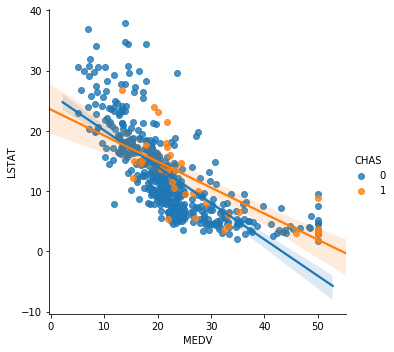

In [8]:
#df2=df[df['MEDV']<50]
pl.figure(figsize=(8,5))
sns.lmplot(data=df,x='MEDV',y='LSTAT', hue='CHAS')

### <center>Figure 5</center>

Inferring from the visuals alone and omitting regression lines as a visual aid, the initial impression from plotting LSTAT against MEDV did not really impart a sense of a substantial difference in properties not bordering the Charles river. The negative correlation is also not that obvious from the visuals and the divide between river bordering properties would not be that clear without the aid of regression lines. 

The 50K capped values in this instance creates the divide and when filtered practically disappear from the plot in __Figure 5__.

<Figure size 576x360 with 0 Axes>

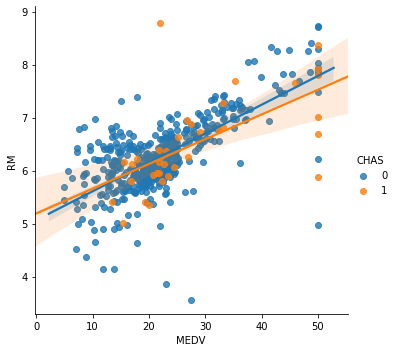

In [9]:
pl.figure(figsize=(8,5))
sns.lmplot(data=df,x='MEDV',y='RM', hue='CHAS')

### <center>Figure 6</center>

A Very similar but positve result is achieved plotting RM against MEDV and creating colour distinctions using CHAS. 

This time the trends cross over mid-range and flips opposite way when 50k cap is filtered out. 

The capping of the property register data at 50k seems to statistically skew the dataset and affect statistical trend in an unrepresented fashion. 

It is therefore not clear at this stage if there is a significant difference in the prices of properties bordering the Charles river and further digging is required to understand all the correlations and effects of the dataset on property value MEDV.

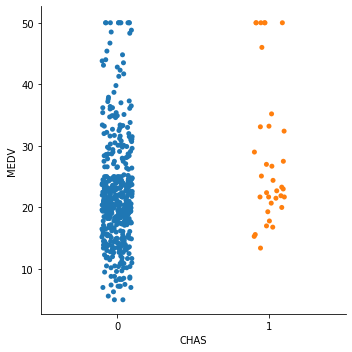

In [10]:
sns.catplot(data=df,x='CHAS', y='MEDV')

### <center>Figure 7</center>

The plot in __Figure 7__ attempts again to separate properties bordering the Charles river to and visualise to price distribution in relation to preferred locations. Visually the minority of bordering river properties do not seem to cover the same representative range of prices, however it is still difficult to arrive at a clear conclusion that bordering the river will have a price benefit on it's own.

Exploring the issue further using a t-test might help arriving at some conclusion. 

In [11]:
import scipy.stats as ss
#import statsmodels.stats.weightstats as ws

In [12]:
chas1=df2[df2['CHAS']==1]['MEDV']
chas0=df2[df2['CHAS']==0]['MEDV']

In [13]:
ss.ttest_ind(chas1, chas0)

Ttest_indResult(statistic=3.9964374660905153, pvalue=7.390623170519708e-05)

Running a t-test using both datasets of 50k cap filtered or not, both yields small enough p values for the t-test to answer the question of significant differences and is discussed in detail below.

### Is there a significant difference in median house prices along the river?

The houses along the river are very well scattered through the dataset in general, however more than 40% of the 50k and above properties are next to the river. To infer significance from plots and data alone provides very vague hints and lacks to instil confidence in ones deductions.

There is also a problem in the dataset that is caused by the 50k cap in the property values and creating vaslty different outcomes everywhere including in the t-test. 

**Running a t-test on the dataset with 50k data yields a very small p-value significantly below 1%, so we we have a clear statistically significant difference and we therefore have to reject the null hypothesis of equal averages using all data.**


Also just looking at the correlation, the value suggest an 18% correlation between facing the river and the values of the house prices and subsequently looking at the variance testing the final Keras model does support the notion that bordering the river has a significance on the property cost and the correlation value of around 18% shows a price difference around the 16% adding and removing the dummy variable to test samples using the Keras model.

This infuence sometimes fails to model with a visible significance and might be down to the initialisation of the network and potentially the lack of linearising the values before modelling. It is therefore with reasonable certainty we can  make the claim that there is a significant value increase for properties bordering the Charles river. 

## Predictive statistics using Keras

The following imports will be required in the Keras Predictive section.

In [14]:
import keras as kr
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from time import time

Using TensorFlow backend.


The house prices are capped at __USD50k__ and as a result creates a skewed affect on the modelling. The dataset is therefore sanitised to only include values below __USD50k__ and modelling performed on the subset below this cap value in order to try and generate a realistic model that can predict property prices based on the dataset criteria.  

In [32]:
df3=df.copy()
df=df[df['MEDV']<50]

The dataset is separated into inputs and outputs and the inputs will consist of all the values except for the __MEDV__ column that is the selling prices of the houses in the dataset.

In [16]:
inputs=df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
np.round(inputs.describe(),3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,490.000,490.000,490.000,490.000,490.000,490.000,490.000,490.000,490.000,490.000,490.00,490.000,490.000
mean,3.643,11.112,11.113,0.059,0.554,6.245,68.279,3.835,9.514,408.002,18.52,355.855,12.924
std,8.722,22.845,6.821,0.236,0.117,0.653,28.165,2.110,8.691,168.065,2.11,92.634,7.083
min,0.006,0.000,0.740,0.000,0.385,3.561,2.900,1.137,1.000,187.000,12.60,0.320,1.980
25%,0.082,0.000,5.190,0.000,0.449,5.881,44.550,2.111,4.000,280.250,17.40,375.912,7.348
50%,0.248,0.000,9.690,0.000,0.538,6.185,76.800,3.276,5.000,330.000,19.10,391.770,11.675
75%,3.647,12.500,18.100,0.000,0.624,6.578,93.875,5.215,24.000,666.000,20.20,396.322,17.118
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.00,396.900,37.970


### <center>Table 4</center>

In [17]:
output=df['MEDV']
np.round(output.describe(),3)

count    490.000
mean      21.636
std        7.865
min        5.000
25%       16.700
50%       20.900
75%       24.675
max       48.800
Name: MEDV, dtype: float64

### Building and training the network

A list of all the options were created and iterated through to explore the effects of all the options to select the best options for creating the network and final model.

Processing Time: 74.67 seconds (1 minutes)


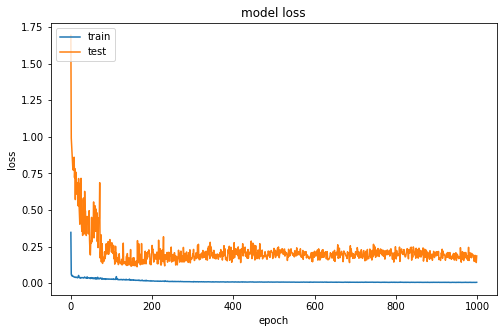

In [18]:
#building sets to iterate through to search for best solution
b=(1,2,4,8,16,32,64,128,256,506)
act=("linear", "sigmoid", "tanh", "elu", "softmax", "selu", "softplus", "softsign", "relu", "hard_sigmoid", "exponential")
ls=("mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error", "mean_squared_logarithmic_error", 
    "squared_hinge", "hinge", "categorical_hinge", "logcosh")
opt=("sgd", "adam", "Adamax", "Nadam", "RMSprop", "Adagrad", "Adadelta")

# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

# for batch in b:
# for action in act:
# for loss in ls:
# for optimiser in opt:

start=time() # mark the start of training
m = kr.models.Sequential()
m.add(kr.layers.Dense(24, input_dim=13, activation="softplus"))
m.add(kr.layers.Dense(12, activation="softplus"))
m.add(kr.layers.Dense(1))
m.compile(loss="mean_squared_logarithmic_error", optimizer="nadam")
hist=m.fit(inputs, output, validation_split = 0.25, epochs=1000, batch_size=8, verbose=0)
#print(hist.history.keys())
end=time() # mark the end of training
print("Processing Time: {:.2f} seconds ({:.0f} minutes)".format(end-start, (end-start)/60))
#plot the training graphs
pl.figure(figsize=(8,5))
pl.plot(hist.history['loss'])
pl.plot(hist.history['val_loss'])
pl.title('model loss')
pl.ylabel('loss')
pl.xlabel('epoch')
pl.legend(['train', 'test'], loc='upper left')
pl.show()


### <center>Figure 8</center>

Finding a final working solutions really feels more like dumb luck than actually doing data science. Iterating through all the options and not making progress created a lot of frustration and manually doing iterations is frustrating and time consuming as one feels like no progress is made until suddenly there is a huge jump and results are good and very accurate. 

The problem with this approach is once a model work on a data set it create a very false impression of having mastered the skill of creating a neural net and training approach as the approach taken for finding a solution on one dataset does not necessarily work on another. 

The initial approach taken was working with low number of batches and epoch and then trying to scale up by taking the best combinations through more epochs. This approach on this dataset failed miserably. 

The big break came by adjusting the validation split down from 0.33 to 0.25 and suddenly lumped down from losses of 5k region to losses of 0.25. This was a total surprise and very much unanticipated.

The second problem is following advice of online gurus and running batches of 1 that slows down everything exponentially and resulted in training runs lasting up to 10 minutes between adjustments. This is tedious and cumbersome to watch and wait to make adjustments.

One of the last issues was caused by the validation spilt and from reading up on the topic stumbled upon a hint indicating the cause of the issue. There was a consistent deviation in the last quarter of the dataset where huge error occurred with prediction error as big as USD7k. This was caused by the validation split that always select datapoint from the last quarter of the dataset and as a result not model properly. The solution was very simple in the end and simply involved refitting using the complete dataset with a validation split as performed in the next section below. 


### Validating the model

Validating the model performance from the training data just completed above and then with all the data again below shows further improvements in accuracy mostly by eliminating big errors caused by gaps in the training data taken away from the last quarter of the dataset only. 

In [19]:
print("Validation Model Loss: {:0.3f}".format(m.evaluate(inputs,output, verbose=0)))

Validation Model Loss: 0.051


In [20]:
start=time()
m.fit(inputs, output, epochs=1000, batch_size=8, verbose=0)
end=time()
print("Validation on Full dataset - Processing Time: {:.2f} seconds ({:.0f} minutes)".format(end-start, (end-start)/60))

Validation on Full dataset - Processing Time: 71.71 seconds (1 minutes)


In [21]:
print("Final Model Loss: {:0.3f}".format(m.evaluate(inputs,output, verbose=0)))

Final Model Loss: 0.010


_Retraining without a validation split improves the final model overall results by a factor of around five times or better._ A lot of time went into trying to figure out what the issue was rendering a cluster of prediction errors in the last quarter of the dataset and the solution was simply to retrain the network with all the data points once a good solution was identified.

The model can now be save and reloaded as required to run predictions on.

In [22]:
m.save('data/good_model.h5')
#m.summary()
#m=kr.models.load_model('data/good_model.h5')
#m.summary()

The cumulative error gives a good summary of the final performance of the model by adding the absolute differences between the predicted and actual numbers together. Getting a value of 50 over about 500 values is pretty good indicating an error of 0.1 across the entire set. The predictions is better than 0.5% and in an acceptable range for this dataset. 

In [23]:
print("cumulative Error: {:.3f} over {} values = {:.4f}".format(np.sqrt(np.sum((m.predict(inputs).T - output.values)**2)), len(output), np.sqrt(np.sum((m.predict(inputs).T - output.values)**2))/len(output)))

cumulative Error: 43.425 over 490 values = 0.0886


The actual result for the current model is calculated above and should be in the region of 50, otherwise retraining is required. 

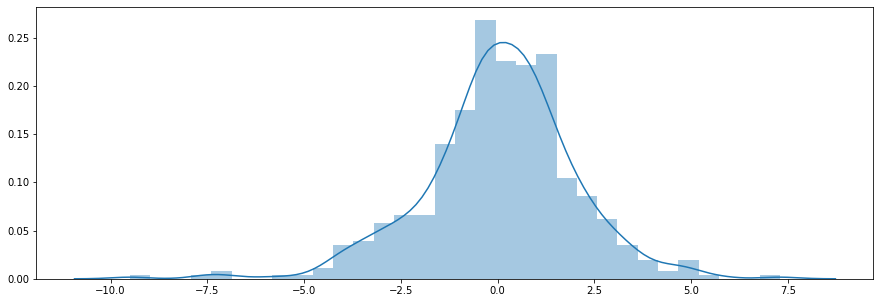

In [24]:
import seaborn as sns
#np.round(m.predict(inputs).T)
#np.round(output.values)
df2=pd.DataFrame(np.round((m.predict(inputs).T - output.values),1)).T
pl.figure(figsize=(15,5))
sns.distplot(df2)

### <center>Figure 9</center>

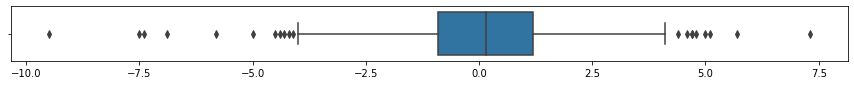

In [25]:
pl.figure(figsize=(15,1))
sns.boxplot(df2)

### <center>Figure 10</center>

Visualising the prediction errors as shown in Figure 9 and 10 show the majority of the predictions well centered and accurately predicting most of the know dataset. The extremes in the tails have errors above five. Outliers accounts for about 3% of the predictions. 

Given all the outliers in the dataset to begin with as shown in __Figure 2__ previously, only creating 3%  outliers in the predictions is a pretty good result. 

### Predict using the model

In [26]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [27]:
CRIM    = 0.0 # 0.00632- Per capita crime rate by town 
ZN      = 0.0    # 18.0   - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS   = 1    # 2.31   - proportion of non-retail business acres per town
CHAS    = 1       # 0      - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX     = 0.0   # 0.538  - nitric oxides concentration (parts per 10 million)
RM      = 6   # 6.575  - average number of rooms per dwelling
AGE     = 15    # 65.2   - proportion of owner-occupied units built prior to 1940
DIS     = 4   # 4.090  - weighted distances to five Boston employment centres
RAD     = 1       # 1      - index of accessibility to radial highways
TAX     = 300     # 296    - full-value property-tax rate per $10,000
PTRATIO = 15    # 15.3   - pupil-teacher ratio by town
B       = 400  # 396.90 - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT   = 0    # 4.98   - % lower status of the population

test = [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]
print("Modelled Value: {:}".format(m.predict(np.asmatrix(test))))

Modelled Value: [[25.610403]]


The last section is a manual tool that allows entry of new values by hand to make prediction of values of other properties based on the other data values in the dataset. 

This was also used to test the influence of values on the overall values. 

## Conclusion

In [35]:
#show only MEDV correlation info, last line...
np.round(df3.corr(),3).tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,-0.45,0.405,-0.6,0.075,-0.524,0.687,-0.493,0.369,-0.476,-0.572,-0.519,0.365,-0.76,1.0


Using data values to set the predictive model on average prediction values to get a median predictive price and then varying the majority of the correlation values up and down to min and max, shows a very strong price movement in line with the individual correlation values, for example CRIM.min is 0.00632 and CRIM.max is 88.9, when varied between min and max the property values reduces by 50% and the corresponding correlation value is -45%.

Experimenting with this however uncovered a huge variance seen in the modelling and work well about 50% of the time re-running the training. There is a huge variance of this predictability and modelling behaviour and probably a lot of additional work required to create a model that is truly representative.

Working through this exercise and training a model on the dataset, while exiting with the prospects brings up more questions than answers and while fitting a given dataset opening up more questions than answers. There is probably potential in the area, but with good reason requiring massive representative datasets to become stable and reliable and the need for speed and number crunching capabilities on specialised platforms quite evident. Even waiting for one minute running iterative tests on a simple dataset of only a few hundred datapoints becomes time consuming.

It is a very interesting area thou but an immersive experience is required to better understand the technology and available tools to create models and predictions with confidence and meaningful output.

# References
## Statistics
1. https://socialresearchmethods.net/kb/statinf.php
1. https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
## Markdown
1. https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
1. https://www.ibm.com/support/knowledgecenter/en/SSGNPV_1.1.3/dsx/markd-jupyter.html
1. https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook
## Plotting
1. https://seaborn.pydata.org/generated/seaborn.regplot.html
1. https://seaborn.pydata.org/examples/many_pairwise_correlations.html
## Keras
1. https://keras.io/
1. https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af
1. https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
1. https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/
1. https://machinelearningmastery.com/evaluate-skill-deep-learning-models/
1. https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
1. https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
1. https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/
1. https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/
1. https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/
1. https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/
## Research 
1. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
1. https://www.ritchieng.com/machine-learning-project-boston-home-prices/
1. http://www.neural.cz/dataset-exploration-boston-house-pricing.html
1. https://github.com/G00364778/52954_Assesment_Machine_Learning_and_Statistics/blob/master/refs/Hedonic_Housing_Prices_and_the_Demand_for_Clean_Air.pdf
1. www.quora.com/What-is-the-difference-between-a-t-value-and-p-value

## About the dataset

In [29]:
# This code block is for reference and contains the code to generate information bout the dataset.
from sklearn.datasets import load_boston
boston = load_boston()

# uncomment the lines below to generate the actual output

#print(boston.data.shape)
print(boston.DESCR) 
#print(boston.feature_names) 
#print(boston.filename)
#print(boston)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu